# Capítulo 5: Compresión de datos mediante reducción de dimensionalidad

# Índice

- [Introducción](#introducción)
- [Extracción de características](#extracción-de-características)
- [Análisis de Componentes Principales (PCA)](#análisis-de-componentes-principales-pca)
- [Análisis discriminante lineal (LDA)](#análisis-discriminante-lineal-lda)
- [Incrustación de vecinos estocásticos distribuidos en t (t-SNE)](#incrustación-de-vecinos-estocásticos-distribuidos-en-t-t-sne)
- [Convertir Jupyter Notebook a Fichero Python](#convertir-jupyter-notebook-a-fichero-python)

## Introducción

Existen diferentes métodos para reducir la dimensionalidad de los conjuntos de datos:

• Las técnicas de selección de características son un enfoque para lograrlo.

• Una alternativa a la selección de características para la reducción de dimensionalidad es la extracción de características, que implica transformar el conjunto de datos en un nuevo subespacio de características con menor dimensionalidad.

La reducción de dimensionalidad o la compresión de datos es importante en algunos casos en el Aprendizaje Automático. ¿Por qué?

• Al transformar datos de mayor dimensión en un espacio de menor dimensión, se reduce la complejidad del conjunto de datos, lo que puede resultar en tiempos de entrenamiento bajos y un uso menor de recursos informáticos.

• Al descartar datos irrelevantes o ruidosos se ayuda a crear datos y modelos más sólidos.

• Al reducir el número de dimensiones, se pueden visualizar datos de 2 a 3 dimensiones, lo que facilita la identificación de patrones y clusters.

La diferencia entre la selección y la extracción de características es la siguiente:

• En la selección de características, se selecciona un subconjunto de características original del conjunto de datos, cuyo objetivo consiste en identificar y mantener las características más relevantes que contribuyan al poder predictivo del modelo.

• En la extracción de características, se transforma y se proyecta el conjunto de datos original en un nuevo espacio de características. Esto implica crear nuevas características combinando las existentes, obteniendo como resultado una dimensionalidad reducida que puede capturar información esencial del conjunto de datos.

## Extracción de características

La extracción de características puede entenderse como un enfoque para la compresión de datos con el objetivo de mantener la mayor parte de la información relevante.

En la práctica, la extracción de características se utiliza para:

• Mejorar el espacio de almacenamiento.

• Mejorar la eficiencia computacional del aprendizaje.

• Permitir una visualización de los datos tanto en 2 como en 3 dimensiones.

• Mejorar el rendimiento predictivo descartando información irrelevante y/o ruidosa.

• Reducir la 'maldición de la dimensionalidad'.

¿Qué problemas pueden ocurrir si se tiene una dimensionalidad alta ('maldición de la dimensionalidad')?

• En dimensiones altas, los datos tienden a ser más escasos. Esto significa que los puntos de datos están más separados, donde la mayor parte del espacio de alta dimensión está vacío, lo que dificulta la identificación de patrones y hace que el desarrollo de agrupaciones y de tareas de clasificación sea más desafiante.

• Por tanto, en dimensiones altas se requieren más datos para llenar el espacio vacío y obtener resultados significativos.

• Si no se tienen más datos, los algoritmos son propensos a sobreajustarse. En un intento por capturar toda la variabilidad del conjunto de datos, el modelo puede volverse complejo y ajustarse a datos irrelevantes y detalles que no se generalizan bien en datos nuevos.

## Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica de transformación de Análisis Lineal No Supervisado ampliamente utilizada en diferentes campos para la extracción de características y la reducción de dimensionalidad.

PCA tiene como objetivo encontrar las direcciones de máxima varianza en datos de alta dimensión, además de proyectar los datos en un nuevo subespacio con las mismas o menos dimensiones que el original.

Los ejes ortogonales del nuevo subespacio se pueden interpretar como las direcciones de máxima varianza dada la restricción de que los nuevos ejes de características son ortogonales entre sí, donde x1 y x2 son los ejes característicos originales, y PC 1 y PC 2 son los componentes principales:

In [1]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_01.png" format="png">
</div>
"""))

W es una matriz de transformación de dimensiones d × k que nos permite mapear un vector de dimensión d de las características del ejemplo de entrenamiento, donde x es un nuevo subespacio de características de dimensión k, el cual tiene menos dimensiones que el espacio de características de dimensión d original (normalmente, k << d).

In [2]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_02.png" format="png">
</div>
"""))

Como resultado de transformar el conjunto de datos de dimensión d original en este nuevo subespacio de dimensión k, el primer componente principal tendrá la mayor variación posible.

Todos los componentes principales consiguientes tendrán una mayor varianza dada la restricción de que estos componentes son no correlacionados (u ortogonales) respecto a otros componentes principales.

Incluso si las características de entrada estuviesen correlacionadas, los componentes principales resultantes serán mutuamente no correlacionados (u ortogonales).

Las direcciones PCA son muy sensibles al escalamiento de datos, cuyas características deben estandarizarse antes de la PCA si las características se midieron en diferentes escalas y se quisiera asignar la misma importancia a todas las características.

La estandarización normalmente implica:

• Centrar los datos: Restar la media de cada característica del conjunto de datos para que cada característica tenga una media de 0.

• Escalar los datos: Dividir cada característica por su desviación estándar para que cada característica tenga una desviación estándar de 1. 

Este proceso a menudo se denomina normalización de puntuación z. Al estandarizar los datos, se garantiza que cada característica contribuya por igual al cálculo de los componentes principales, permitiendo a PCA identificar las direcciones de máxima varianza sin verse sesgadas por la escala de las características.

El enfoque se resumen en 7 sencillos pasos:

1. Estandarizar el conjunto de datos de dimensión d.

2. Construir la matriz de covarianza.

3. Descomponer la matriz de covarianza en vectores y valores propios.

4. Ordenar los valores propios en orden decreciente para clasificar los correspondientes vectores propios.

5. Seleccionar k vectores propios, que corresponden a los k valores propios más grandes, donde k es la dimensionalidad del nuevo subespacio de características (k <= d).

6. Construir una matriz de proyección W a partir de los k vectores propios “superiores”.

7. Transformar el conjunto de datos de entrada de dimensión d usando la matriz de proyección W para obtener el nuevo subespacio de características de dimensión k.

In [3]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_03.png" format="png">
</div>
"""))

La matriz de covarianza es un caso especial de matriz cuadrada, la cual es simétrica, lo que significa que la matriz es igual a su traspuesta (A = A^T).

Cuando se descompone propiamente una matriz simétrica de este tipo, los valores propios son números reales (en lugar de complejos) y los vectores propios son ortogonales (perpendiculares) a cada uno.

Además, los valores propios y los vectores propios vienen en pares. Si se descompone una matriz de covarianza en sus vectores y valores propios, los vectores propios asociados con el valor propio más alto corresponden a la dirección de varianza máxima en el conjunto de datos.

In [4]:
import pandas as pd
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None
)

In [5]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split dataset in train and test set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# Standarize the features and the d-dimensional dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Después de la estandarización, se construye la matriz de covarianza.

Es una matriz simétrica de dimensiones d x d, donde d es el número de características en el conjunto de datos, la cual almacena las covarianzas por pares entre las diferentes características.

Por ejemplo, se puede calcular la covarianza entre dos características utilizando la siguiente ecuación:

In [6]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_04.png" format="png">
</div>
"""))

Por ejemplo, la matriz de covarianza de tres características puede escribirse de la siguiente manera:

In [7]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_05.png" format="png">
</div>
"""))

Los vectores propios de la matriz de covarianza representan los componentes principales (direcciones de máxima varianza), mientras que los valores propios correspondientes definen su magnitud.

In [8]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_06.png" format="png">
</div>
"""))

In [9]:
import numpy as np

# Compute the covariance matrix
cov_mat = np.cov(X_train_std.T)

# linalg.eig() function
# Calculate the eigenvalues and eigenvectors of the covariance matrix
# We use the linalg.eig function from NumPy to compute the eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)
print('\nEigenvectors \n', eigen_vecs)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
 [[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.189

Como se quiere reducir la dimensionalidad del conjunto de datos, se selecciona solo el subconjunto de los vectores propios (componentes principales) que contiene la mayor parte de la información (varianza).

Los valores propios definen la magnitud de los vectores propios, por lo que se tienen que ordenar los valores propios por magnitud en orden decreciente.

Se tiene interés ​​en los k vectores propios superiores en función de sus valores propios correspondientes.

A continuación, se trazan los ratios de varianza explicados de los valores propios, donde la relación de varianza explicada de un valor propio es simplemente la fracción de un valor propio y la suma total de los valores propios:

In [10]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_07.png" format="png">
</div>
"""))

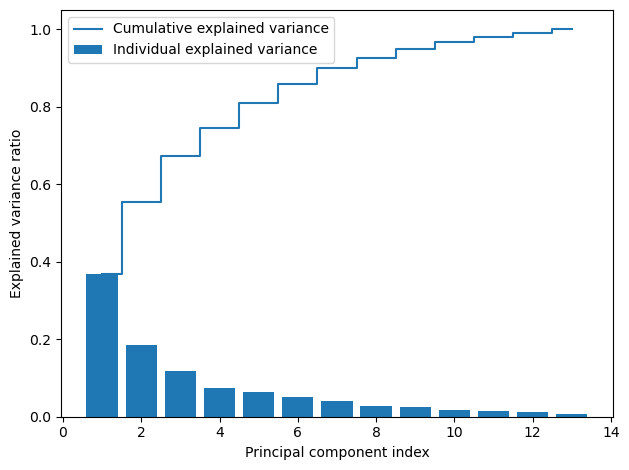

In [11]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Usando la función de NumPy cumsum(), se puede calcular la suma acumulada de las varianzas explicadas.

El gráfico resultante indica que el primer componente principal representa aproximadamente el 40% de la varianza en todo el conjunto de datos.

Además, se puede ver que los dos primeros componentes principales combinados representan casi el 60% de la varianza en todo el conjunto de datos.

Se descompone la matriz de covarianza en pares propios (vectores propios y valores propios). Una vez hecho esto, hay que:

• Ordenar los valores propios en orden decreciente.

• Seleccionar k vectores propios correspondientes a los k valores propios más grandes, donde k es la dimensionalidad del nuevo subespacio de características (k <= d).

• Construir una matriz de proyección W a partir de los k vectores propios.

• Transformar el conjunto de datos de entrada de dimensión d usando la matriz de proyección W para obtener el nuevo subespacio de características de dimensión k.

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# Dos dimensiones
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [13]:
# Una muestra (x' = xW)
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [14]:
# El dataset completo (X' = XW)
X_train_pca = X_train_std.dot(w)

Se visualiza el conjunto de datos de entrenamiento transformado en un diagrama de dispersión en formato bidimensional.

Aunque se codifique la información de la etiqueta de clase con fines ilustrativos en el diagrama de dispersión anterior, se debe tener en cuenta que PCA es una técnica no supervisada que no utiliza ninguna clase de información de la etiqueta.

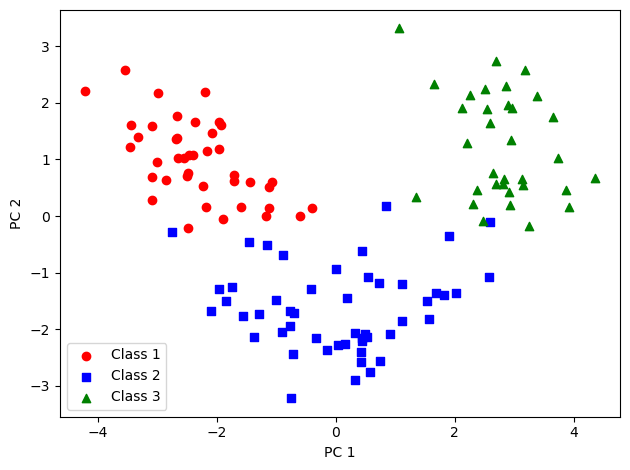

In [15]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


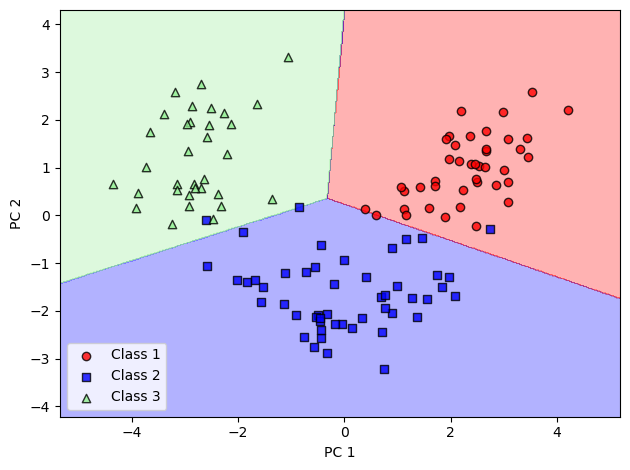

In [17]:
# Principal component analysis in scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Inicialización del transformador de PCA
# y del estimador de Regresión Logística
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')

# Reducción de dimensionalidad
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Ajuste del modelo de Regresión Logística en el dataset reducido
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

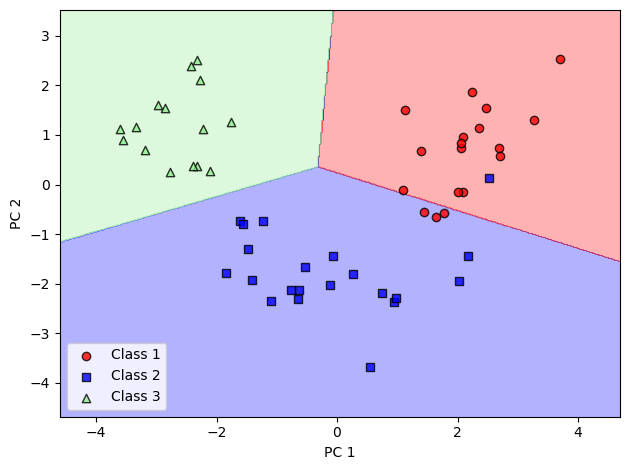

In [18]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Si lo que interesa son los ratios de varianza explicados de los diferentes componentes principales, simplemente se inicializa la clase PCA con el parámetro n_components establecido como None, por lo que todos los componentes principales se mantienen y luego se puede acceder a la relación de varianza explicada a través del atributo explained_variance_ratio.

In [19]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

Las nuevas características representan combinaciones lineales de las características originales con los componentes principales, donde cada Wij son las contribuciones de las funciones originales a la nueva función.

In [20]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_08.png" format="png">
</div>
"""))

Sin embargo, para medir las contribuciones de las características originales a la nueva característica, se utilizan versiones escaladas de W, donde cada vector propio se multiplica por la raíz cuadrada de su valor propio, cuyo resultado se denomina como 'carga'.

¿Por qué es importante escalar?

* Los valores resultantes pueden entonces interpretarse como la correlación entre las características originales y las nuevas características.

In [21]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

A continuación, se trazan las cargas para el primer componente principal (loadings[:, 0]), es decir, la primera columna de esta matriz.

Por ejemplo, el alcohol tiene una correlación negativa con la primera característica nueva (aproximadamente –0,3), mientras que el ácido málico tiene una correlación positiva (aproximadamente 0,54).

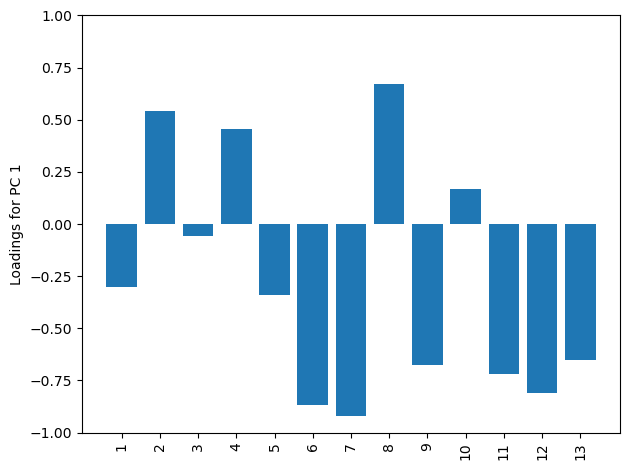

In [22]:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

Se pueden obtener las cargas de un objeto PCA de scikit-learn ajustado de forma similar, donde pca.components_ representa los vectores propios y pca.explained_variance_ representa los valores propios.

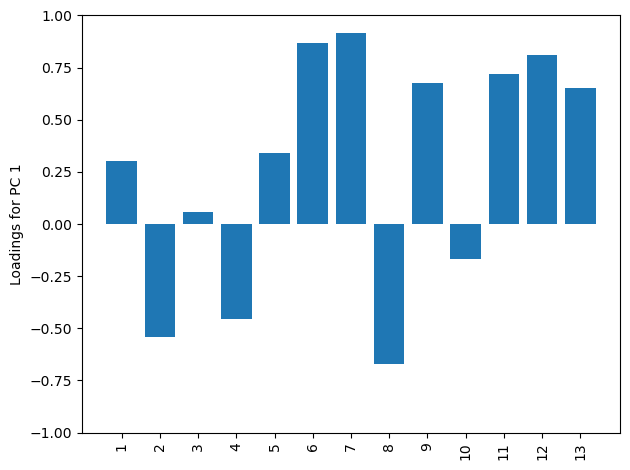

In [23]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

## Análisis discriminante lineal (LDA)

Después de explorar PCA como una técnica de extracción de características no supervisada, presentamos el Análisis Discriminante Lineal (LDA).

LDA es una técnica de transformación lineal que toma información y tiene en cuenta las etiquetas de cada clase (algoritmo supervisado).

Es una técnica de transformación lineal que se puede utilizar para reducir el número de dimensiones (a veces también se denomina LDA de Fisher).

LDA busca encontrar una proyección lineal de los datos que maximice la separabilidad entre diferentes clases.

En otras palabras, LDA intenta identificar una o más direcciones en el espacio de características (discriminadores lineales) que maximicen la distancia entre las medias de cada clase.

El número máximo de discriminantes lineales que puede ser obtenido con LDA está determinado por el número de clases y el número de características en su conjunto de datos.

Específicamente, el número máximo de discriminantes lineales es el menor de:

• C - 1, donde C es el número de clases en el conjunto de datos.

• d, donde d es el número de características originales.

Por tanto, el número máximo de discriminantes lineales es mín(C - 1, d).

In [24]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_09.png" format="png">
</div>
"""))

Estos son los pasos principales requeridos para realizar LDA:

1. Estandarizar el conjunto de datos de dimensión d, donde d es el número de características.

2. Calcular el vector medio de dimensión d para cada clase.

3. Construir la matriz de dispersión entre clases Sb y la matriz de dispersión dentro de clases Sw.

4. Calcular los vectores y valores propios correspondientes de la matriz Sw ^ -1 * Sb.

5. Ordenar los valores propios en orden decreciente para clasificar los vectores propios correspondientes.

6. Elegir los k vectores propios que correspondan a los k valores propios más grandes para construir una matriz de transformación W de dimensiones d x k, donde los vectores propios son las columnas de esta matriz.

7. Proyectar los ejemplos en el nuevo subespacio de características usando la matriz de transformación W.

Se construye la matriz de dispersión dentro de clases y entre clases, donde cada vector medio mi almacena el valor medio de la característica 𝜇𝑚 respecto a los ejemplos de la clase i:

In [25]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_10.png" format="png">
</div>
"""))

In [26]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(
                X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



Ahora podemos calcular la matriz de dispersión dentro de clases, Sw, compuesta por matrices de dispersión individuales, Si, de cada clase individual:

In [27]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_11.png" format="png">
</div>
"""))

In [28]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


La suposición realizada cuando se calcula la matriz de dispersión es que las etiquetas de clase en el conjunto de datos de entrenamiento son distribuidas uniformemente.

Sin embargo, si se imprimen el número de etiquetas de clase, se puede ver lo siguiente:

In [29]:
print('Class label distribution:',  
      np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


Se quieren escalar las matrices de dispersión individuales Si antes de ser resumidas como la matriz de dispersión Sw.

Cuando se dividen las matrices de dispersión por el número de ejemplos de clase ni, se puede ver que el cálculo de la matriz de dispersión equivale al cálculo de la matriz de covarianza Σ𝑖, donde la matriz de covarianza es una versión normalizada de la matriz de dispersión:

In [30]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_12.png" format="png">
</div>
"""))

In [31]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


Después de calcular la matriz de dispersión dentro de la clase escalada (o matriz de covarianza), se puede pasar al siguiente paso y calcular la matriz de dispersión entre clases Sb, donde m es la media general que se calcula incluyendo ejemplos de todas las clases c:

In [32]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_13.png" format="png">
</div>
"""))

In [33]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1) 

d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot(
        (mean_vec - mean_overall).T)
print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


Se realiza la descomposición propia en la matriz Sw ^ -1 * Sb:

In [34]:
eigen_vals, eigen_vecs =\
    np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

Después de calcular los pares propios, se pueden ordenar los valores propios en orden descendente:

In [35]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, 
                     key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


Se apilan las dos columnas de vectores propios más discriminativas para crear la matriz de transformación W:

In [36]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


Usando la matriz de transformación W, se puede transformar el conjunto de datos de entrenamiento multiplicando las matrices (X' = XW):

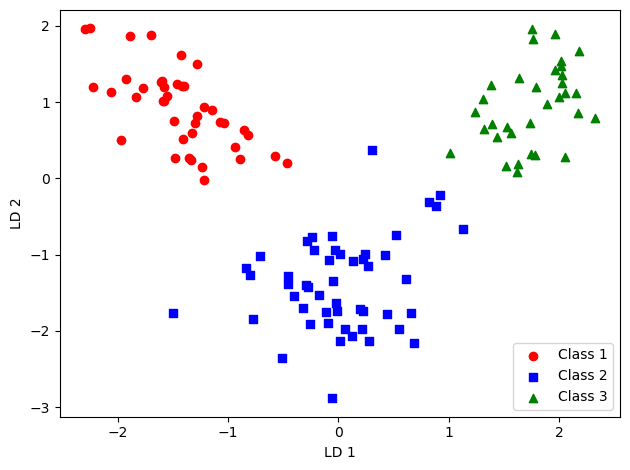

In [37]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Usando scikit-learn:

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


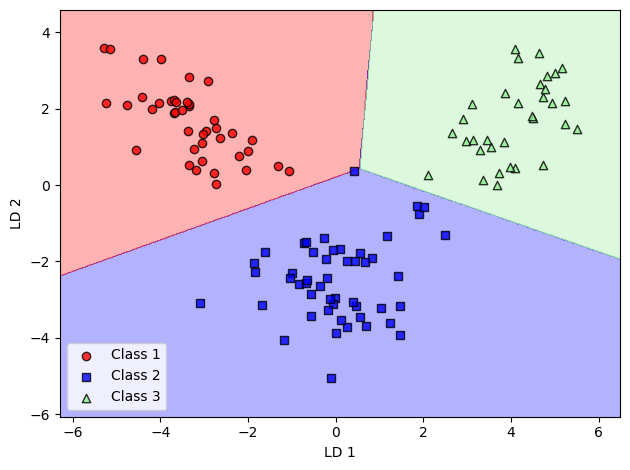

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1, 
                        solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

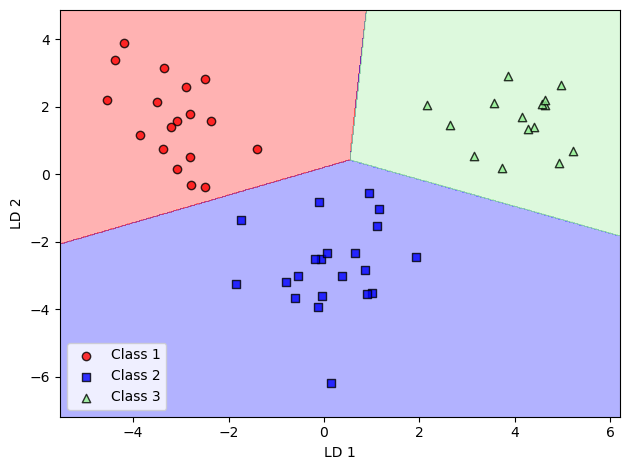

In [39]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Incrustación de vecinos estocásticos distribuidos en t (t-SNE)

PCA y LDA son técnicas de transformación lineal para funciones de extracción. Sin embargo, existen técnicas de reducción de dimensionalidad no lineal.

Una es la incrustación de vecinos estocásticos distribuidos en t (t-SNE), muy utilizada para visualizar conjuntos de datos de alta dimensión en 2 o 3 dimensiones.

¿Por qué se debe considerar la reducción de dimensionalidad no lineal?

• Muchos algoritmos de aprendizaje automático hacen suposiciones sobre la separabilidad lineal de los datos de entrada.

• Sin embargo, si se están tratando problemas no lineales encontrados con bastante frecuencia en aplicaciones del mundo real, existen técnicas de transformación lineal para la reducción de dimensionalidad como PCA, aunque LDA no puede ser la mejor opción.

In [40]:
from IPython.display import Image, HTML
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/05_14.png" format="png">
</div>
"""))

t-SNE aprende a incrustar puntos de datos en una dimensión espacial inferior tal que las distancias por pares en el espacio original se conservan.

t-SNE es una técnica destinada a fines de visualización, ya que requiere todo el conjunto de datos para la proyección.

Dado que los puntos se proyectan directamente, a diferencia de PCA que no involucra una matriz de proyección, no se puede aplicar t-SNE a nuevos puntos de datos.

A continuación, se muestra una demostración rápida de cómo se puede aplicar t-SNE al conjunto de datos de dígitos de 64 dimensiones:

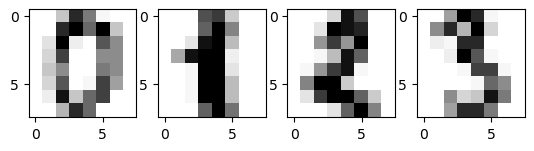

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show() 

In [42]:
digits.data.shape

(1797, 64)

In [43]:
y_digits = digits.target
X_digits = digits.data

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

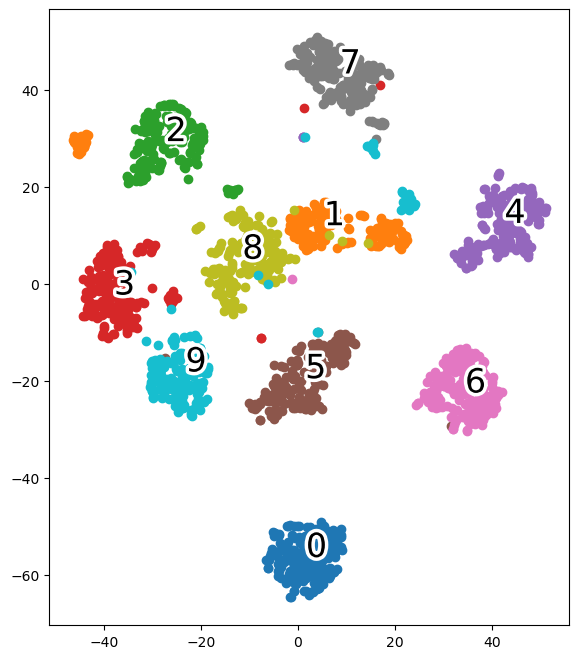

In [45]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
plt.show()

## Convertir Jupyter Notebook a Fichero Python

In [46]:
! python .convert_notebook_to_script.py --input ch05_notebook.ipynb --output ch05_notebook.py

[NbConvertApp] Converting notebook ch05_notebook.ipynb to script
[NbConvertApp] Writing 29610 bytes to ch05_notebook.py
